# GGI: building products from materials

### <font color="darkblue">Emily Joiner and Jordan Wingenroth</font>

###### <font color = "darkblue">March 6th, 2025</font>

## Thus far

1. We built our initial (v.0) prototype focused on interactivity, using [Shiny](https://shiny.posit.co/) for R

2. Jan and Brian provided feedback about functionalities required, including:

- Estimating GGI for a **facility** with unique fuel sources and production methods

- Cataloguing: printing a comprehensive list of the "ingredients" for a product/facility

- Data visualization, with an initial focus on stacked bar charts breaking down GGI categorically

3. We switched to using **Python** because its support for object-oriented programming (OOP) is well suited to the modular nature of this project

In [16]:
from product_types import *
from precal_classes import *
from data_visualization import *
from copy import deepcopy

## New features

### Two Python objects (each a `class` in programmer lingo)

- `Fuel`: an object that could be used to represent coal, natural gas, or other fossil fuels as currently described and parameterized in the *39 Sectors* report

- `Product`: an object that takes one or more `Fuel` objects as inputs, with a ratio term to quantify the amount of "fuel" required per unit "product"

## New features

### An example of a fuel

In [17]:
# Natural Gas

nat_gas = Fuel(name = "Natural Gas", carbon_frac = 0.763, processing = 0.258)

print(nat_gas)

'Natural Gas' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = False


## New features

### An example of a product

In [18]:
# Liquified Natural Gas

lng = Product(name = "LNG", processing = 0)

lng.add_feedstock(nat_gas, unit_ratio = 1/.9)

print(lng)

'LNG' product, 1 input(s), processing emissions = 0


## New features

### An example of a method

A method is a function that operates on a class (`Fuel` or `Product`).

For example, calculating greenhouse gas intensity:

In [19]:
nat_gas_ggi = nat_gas.ggi_co2e()

round(nat_gas_ggi, 3) # rounds to 3 sig. fig.

3.056

This number matches the value from the Excel spreadsheet with the same parameterization.

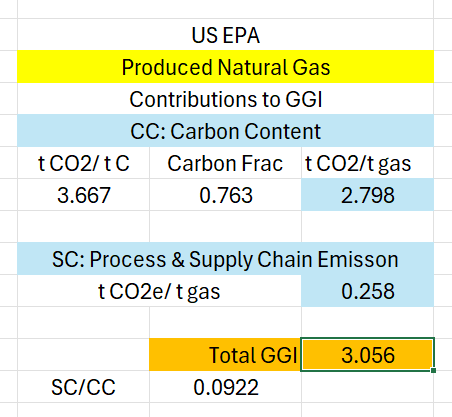

## New features

### An example of a method

A method is a function that operates on a class (`Fuel` or `Product`).

Calculating greenhouse gas intensity is possible for products too:

In [20]:
lng_ggi = lng.ggi_co2e()

round(lng_ggi, 3) # rounds to 3 sig. fig.

3.395

This number also matches the value from the Excel spreadsheet, although the spreadsheet value has rounding error due to copy-pasting.

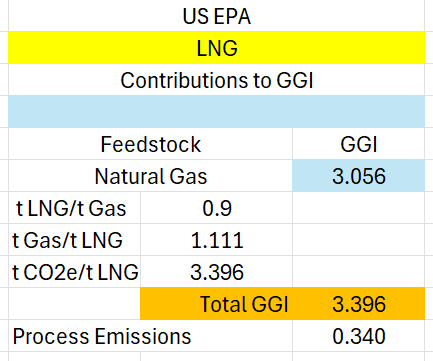

## New features

### Another method

We also built a basic method for addressing leakage for the fuel class:

In [21]:
leaky_nat_gas = deepcopy(nat_gas)
leaky_nat_gas.set_leakage(leak_rate = 0.01, gwp = 30)
leaky_nat_gas.name = "NG 1% leak"

print(leaky_nat_gas)

leaky_ggi = leaky_nat_gas.ggi_co2e()

round(leaky_ggi, 3)

'NG 1% leak' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = True


3.356

This does not quite line up with the value in the latest iteration of the spreadsheet because of the algebra surrounding leakage and processing, but it will be easy to fix once we ship over the right math.

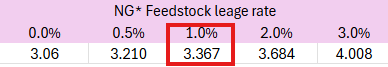

## New features

### More complex products

It is feasible to build more complex products "from scratch". Here's an example, taken from the other Excel workbook:

In [22]:
# BOF Raw Steel

steel = Product("BOF raw steel", 0)

# feedstocks
iron = Fuel("Iron ore", 0, .168)
coal = Fuel("Coal", 0.93/1.5, 0.034)
coke = Product("Coke", 0.496)
coke.add_feedstock(coal, unit_ratio = 1.5)
oxygen = Fuel("Oxygen", 0, .525)
limestone = Fuel("Limestone", 0, 0.44)

# update steel
steel.add_feedstock(iron, unit_ratio = 1.6)
steel.add_feedstock(coke, unit_ratio = 0.65)
steel.add_feedstock(oxygen, unit_ratio = 0.154)
steel.add_feedstock(limestone, unit_ratio = 0.25)

print(steel)

# calculate GGI
steel.ggi_co2e()


'BOF raw steel' product, 4 input(s), processing emissions = 0


3.0317

Another match!

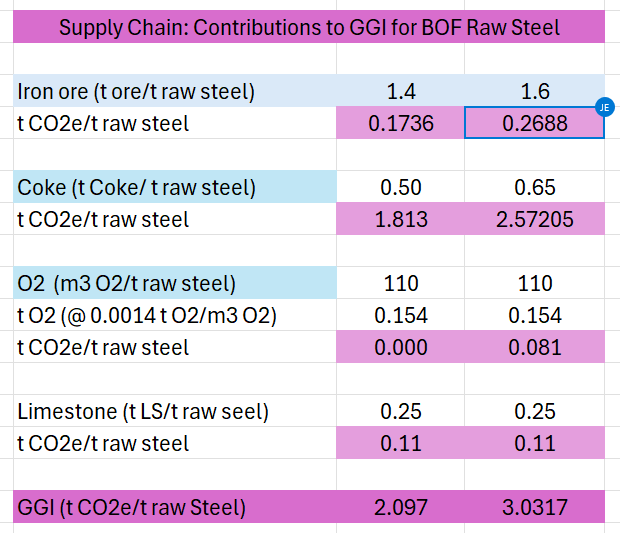

## New features

### "Catalog" output

We added a preliminary version of the "ingredient list" functionality requested by Jan and Brian:

In [23]:
steel_catalog = steel.catalog()

print(steel_catalog)

'BOF raw steel' product, 4 input(s), processing emissions = 0
├── 'Coke' product, 1 input(s), processing emissions = 0.496
│   └── 'Coal' fuel, carbon fraction = 0.62, processing emissions = 0.034, leakage = False, ratio = 1.5
├── 'Iron ore' fuel, carbon fraction = 0, processing emissions = 0.168, leakage = False, ratio = 1.6
├── 'Limestone' fuel, carbon fraction = 0, processing emissions = 0.44, leakage = False, ratio = 0.25
└── 'Oxygen' fuel, carbon fraction = 0, processing emissions = 0.525, leakage = False, ratio = 0.154



This `catalog()` function should work for relatively simple products, and it is easy enough to reprogram it to print different product/fuel characteristics if desired. For especially complex trees, a graphic or interactive output might be worthwhile.

## New features

### Data visualization

We also added a `Plot` class, which facilitates making stacked bar charts of different fuels. It's not yet implemented for the `Product` class, but we can build that in soon.

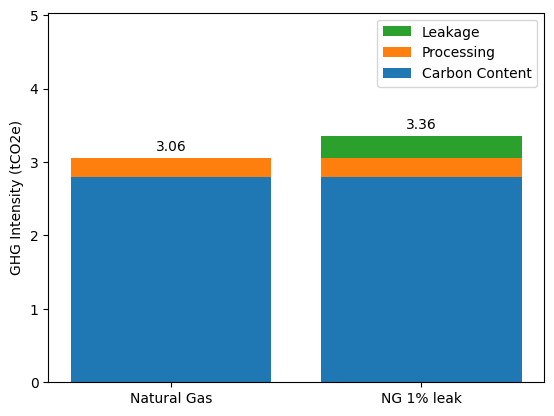

In [24]:
bar_plot = Plot(nat_gas, leaky_nat_gas)

bar_plot.column_plot()